\newpage

## Question 

In this assignment, you will delve into the K-Nearest Neighbors (KNN) algorithm. You'll apply the KNN algorithm to a dataset from Kaggle, allowing you to practice real-world data science skills, including data retrieval, preprocessing, model fitting, and evaluation. 

For this assignment, you will use the "Wine Quality" dataset available on Kaggle. This dataset contains physicochemical attributes of red and white variants of the Portuguese "Vinho Verde" wine. You will predict the quality of the wine (reduced to three quality scores) based on these attributes.

Link to the dataset: [Wine Quality Dataset on Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality)

1. Ensure you have a Kaggle account. If not, sign up at [kaggle.com](https://www.kaggle.com/). Download the Wine Quality dataset from Kaggle. Cite the dataset.

[@misc_wine_quality_186]


2. Load the dataset into a pandas DataFrame for analysis.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [2]:

wine_df = pd.read_csv("winequalityN.csv")

3. Perform an initial exploration of the dataset to understand its structure (the number of features, observations, and variable types). Write about at least two findings.

In [3]:
wine_df.info

<bound method DataFrame.info of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total

The dataset contain 6497 observation and 13 columns. And there are one category data. 

4. Generate summary statistics for the dataset. Comment on the results (at least two statements). 



In [4]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The range of quality is 3 to 9. And there are some missing value in the dataset. because of count of each variable is not equal. 

5. Visualize the distribution of wine quality ratings. Comment on the plot (at least one statement).

E:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='quality', ylabel='Count'>

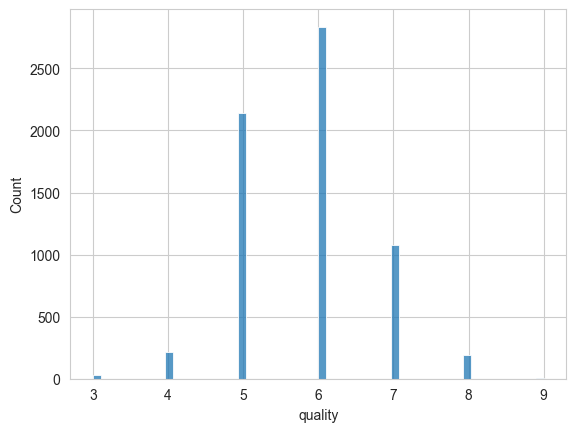

In [5]:
sns.histplot(
    data=wine_df,
    x='quality'
)

6 out 10 quality have the most wine.

6. Drop the observations with quality scores less than or equal to four and greater than or equal to eight. Use this subset of the dataset for the following analysis.

In [6]:
filter_wine_df = wine_df[(wine_df['quality'] > 4) & (wine_df['quality'] < 8)]


7. How many observations and unique quality scores are in the filtered data?

In [22]:
print(f"There are total {len(filter_wine_df)} observations")

print(f"There are { len(filter_wine_df['quality'].value_counts()) } of unique quality scores")

There are total 6022 observations
There are 3 of unique quality scores


In [21]:
wine_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

8. Create a correlation heatmap. Describe any correlations between features using a correlation matrix (at least two statements). 



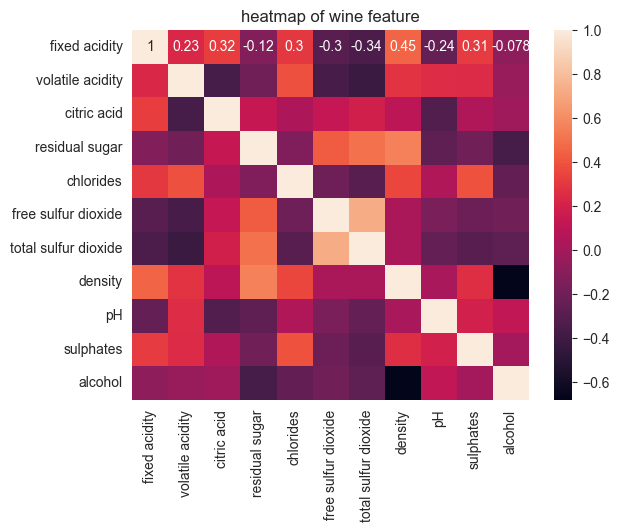

In [8]:
df_excluded = filter_wine_df.drop(['type', 'quality'], axis =1)

sns.heatmap(
    df_excluded.corr(),
    annot=True
)
plt.title("heatmap of wine feature")
plt.show()

This showed the correlation of each covariate on the x and y. The matrix is symmetrical. For the Positive number means two covariates are positively correlated and for the negative number means the two covariates are negatively correlated. 

9. Are there any missing values? If you identify any, drop those observations with the missing values.

In [9]:
filter_wine_df.isnull().sum()

type                    0
fixed acidity           9
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               3
alcohol                 0
quality                 0
dtype: int64

In [10]:
filter_wine_df = filter_wine_df.dropna()


10. In this assignment, skip the outlier analysis. Standardize the predictor variables (don't use the `type` variable) to ensure they are on the same scale. Why is standardizing predictor variables crucial when using the K-Nearest Neighbors (KNN) classifier? 


In [11]:
x = filter_wine_df.drop(['type','quality'],axis=1)
y = filter_wine_df.quality

x = scale(x,axis=0)

Standardization is to avoid the scale of features is very different for KNN. If one feature value are larger then other. Then the KNN will classification will not accurate.



11. Split the dataset into a training set(75\%) and a testing set (25\%).

\color{blue}
Hint: Use startified random sampling.
\color{black}

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=0,
    stratify=y
    )

12. Implement the KNN classifier using `scikit-learn`. Start with k=5.

In [13]:
knn5 = neighbors.KNeighborsClassifier(
    n_neighbors = 5,
    algorithm='brute'
    )



13. Train the model on the training set and make predictions on the test set.

In [14]:
knn5.fit(x_train, y_train)



KNeighborsClassifier(algorithm='brute')

In [15]:
pred5 = knn5.predict(x_test)
pred5

array([6, 6, 5, ..., 6, 6, 6], dtype=int64)

14. Calculate the accuracy of the model. Discuss the model's performance (compare the model's performance to flipping a coin)

\color{blue}
Hint: Evaluate the model on the test set.
\color{black}

In [16]:
print(round(metrics.accuracy_score(y_test, pred5),2))


0.6


15. Generate a confusion matrix. Describe the confusion matrix (what are rows and columns?).



In [17]:

cmatrix = confusion_matrix(y_test,pred5)
cmatrix

array([[342, 180,  10],
       [186, 444,  75],
       [ 35, 119, 115]], dtype=int64)

The row is true value and the column is the predict value

16. Discuss any potential improvements based on the accuracy and confusion matrix.

It's possiable that pick other k value to improve accuracy

17. Experiment with different values of $K$ to find the optimal number of neighbors for the KNN classifier.

In [18]:
k_range = range(1, 8)
scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))

18. Plot the relationship between $K$ and model accuracy.

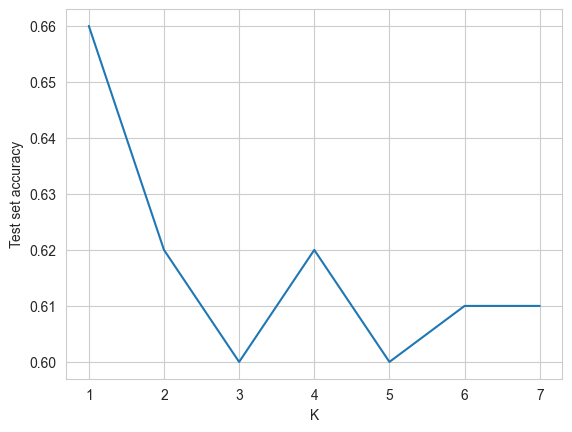

In [19]:
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,8))
plt.show()

19. Select the best $K$ value and explain why it is optimal.

In [20]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(round(metrics.accuracy_score(y_test, y_pred),2))

0.62


Because in range 2 to 7. K=4 give the highest test set accuracy. 

20. Reflect on the performance of the KNN algorithm for this particular dataset.

I think KNN algorithm do not perform well. when K increase we want to see increase an accuracy. But in this case I didn't see it.

21. Propose at least two ways the model performance could be further improved.

I consider reduce the number of varible x and the dimenson of x.